In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\data-flair projects\\Credit card fraud detection\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
# data.info()
#data.describe()
#data.columns
#data.nunique()
#data['Class'].unique()
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [31]:
#data.select_dtypes(exclude=[np.number])
#data.isnull().sum().sort_values(ascending=False)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

d=data['Amount'].values
print(scaler.fit(d.reshape(-1,1)))

StandardScaler()


In [7]:
d1=scaler.transform(d.reshape(-1,1))

In [8]:
data1 = data
data1['Scaled_Amount'] = d1

In [9]:
data1=data1.drop(['Amount'], axis=1)

In [10]:
s=data1.drop(['Class'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s, data['Class'], test_size = 0.23, random_state=2)

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression( max_iter=500)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [130]:
x_test[:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount
225184,144140.0,-0.581460,0.950267,0.115938,-1.384767,1.388364,-1.595678,2.120867,-0.718954,-0.205211,...,-0.292792,0.153480,0.656548,-0.514192,0.077220,0.736220,-0.302469,-0.254862,-0.126279,-0.301974
116637,74369.0,0.686730,-0.785586,0.945092,1.476634,-1.191074,-0.193185,-0.217963,-0.011827,0.727172,...,0.388521,0.277960,0.419683,-0.314303,0.427369,0.426733,-0.285560,0.022906,0.079838,0.671840
99414,67107.0,-0.848395,1.214313,0.954869,-0.030145,-0.177527,-0.851855,0.444232,0.369063,-1.005181,...,0.079630,0.205928,0.552455,-0.064845,0.590082,-0.271787,0.276440,0.217840,0.127724,-0.287501
217619,140965.0,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,...,0.511897,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.151103,0.216899,0.726254
279878,169155.0,2.061985,-0.114758,-1.079406,0.427062,-0.229701,-1.241109,0.121975,-0.283331,0.679923,...,-0.284520,-0.299538,-0.772333,0.352777,0.021161,-0.330437,0.198512,-0.076625,-0.061905,-0.348072
65395,51563.0,1.244227,-0.101440,0.099086,0.054900,-0.468767,-0.918947,0.022217,-0.210206,0.260107,...,-0.006477,0.012270,-0.034518,-0.120869,0.108345,0.401389,1.089648,-0.095310,0.003413,-0.179912
242975,151739.0,0.303629,0.715442,0.214757,-0.241157,0.331445,-1.079975,0.893378,-0.232996,-0.079911,...,-0.178844,-0.183558,-0.451898,0.148788,0.032878,-0.964023,0.141797,0.074757,0.099186,-0.349671
87590,61752.0,-3.570175,-0.267229,-1.224934,0.079427,0.707277,0.236304,-0.673688,1.188933,-0.391817,...,-1.232241,0.013297,-0.159708,-1.214678,-1.625537,-0.677161,-0.714352,-0.387393,-0.434543,0.034505
9682,14460.0,-0.647246,-0.109592,2.025804,0.151322,0.717499,0.035661,-0.292713,-0.002243,0.931187,...,0.359450,0.112957,0.601418,-0.029290,-0.265326,-0.649369,1.105885,-0.116723,-0.094106,-0.289460
223491,143406.0,-0.157844,1.136928,-0.610240,0.536476,0.957214,0.213690,0.696157,0.308939,-0.347100,...,-0.181837,0.358220,1.211744,-0.145614,0.082425,-0.517143,-0.491332,0.174666,0.204779,-0.268150


In [131]:
predictions = reg.predict(x_test)

In [132]:
reg.predict(x_test[1000:1070])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [133]:
score = reg.score(x_test, y_test)
score

0.9993283058040485

In [135]:
print("Accuracy is  ", accuracy_score(y_test, predictions)*100)

Accuracy is   99.93283058040485


In [136]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[65394,    13],
       [   31,    68]], dtype=int64)

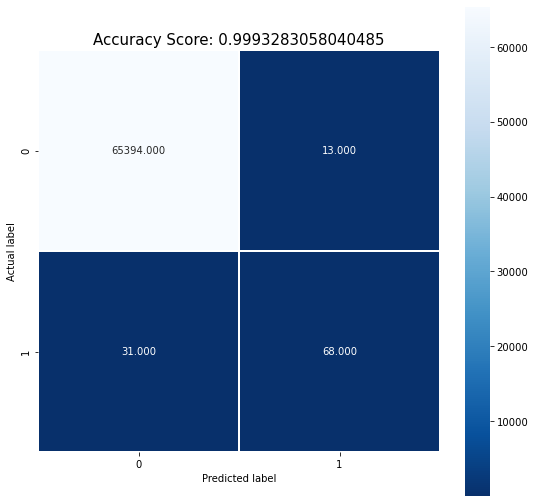

In [137]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### 'entropy'

In [139]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state= 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [142]:
y_pred = clf_entropy.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
print("Accuracy is  ", accuracy_score(y_test, y_pred)*100)

Accuracy is   99.94656977986749


### 'gini'

In [144]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state= 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [145]:
y_pred_gini = clf_entropy.predict(x_test)
y_pred_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
print("Accuracy is  ", accuracy_score(y_test, y_pred_gini)*100)

Accuracy is   99.94656977986749


## Gradient Boosting (GBM)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=10)

In [13]:
gbm.fit(x_train, y_train)

GradientBoostingClassifier(random_state=10)

In [14]:
pred_gbm = gbm.predict(x_test)
pred_gbm_prob = gbm.predict_proba(x_test)

In [16]:
feat = [x for x in x_train.columns ]
feat_imp = pd.Series(gbm.feature_importances_, feat).sort_values(ascending=False)

Text(0, 0.5, 'Feature Importance Score')

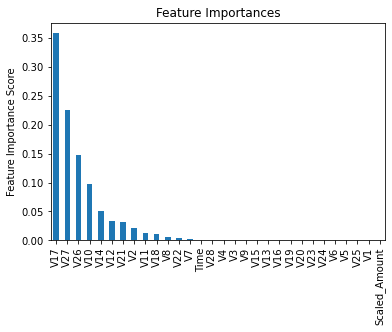

In [17]:
feat_imp = pd.Series(gbm.feature_importances_, feat).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [19]:
cv_score = cross_validate(gbm, x_train, y_train, cv=5, scoring='roc_auc')

In [20]:
cv_score

{'fit_time': array([468.4870429 , 474.89909196, 548.17790031, 471.15540123,
        483.76362514]),
 'score_time': array([0.15790606, 0.14491248, 0.15390635, 0.14591074, 0.14691043]),
 'test_score': array([0.67709651, 0.82030989, 0.8712754 , 0.50028233, 0.85310546])}

In [21]:
roc_auc_score(y_test, pred_gbm)

0.802938569729586

In [22]:
print ("AUC Score (Train): %f :", roc_auc_score(y_test, pred_gbm_prob[:,1]))

AUC Score (Train): %f : 0.69179989229831


In [23]:
print("Accuracy is  ", accuracy_score(y_test, pred_gbm)*100)

Accuracy is   99.92214453637834
